# Predict if people prefer WFH vs WFO post Covid-19

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  

In [2]:
workdata= pd.read_csv('D:/DS projects/work from home classification/WFH_WFO_dataset.csv')
workdata.head()

,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [3]:
workdata.columns

Index(['ID', 'Name', 'Age', 'Occupation', 'Gender',
       'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time',
       'RM_better_sleep', 'calmer_stressed', 'RM_professional_growth',
       'RM_lazy', 'RM_productive', 'digital_connect_sufficient',
       'RM_better_work_life_balance', 'RM_improved_skillset',
       'RM_job_opportunities', 'Target'],
      dtype='object')

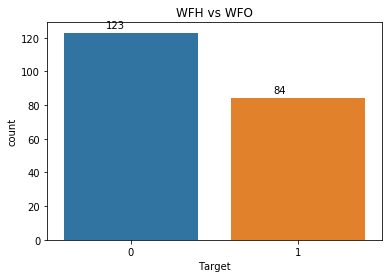

In [4]:
ax=sns.countplot(x='Target',data=workdata)
plt.title('WFH vs WFO')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

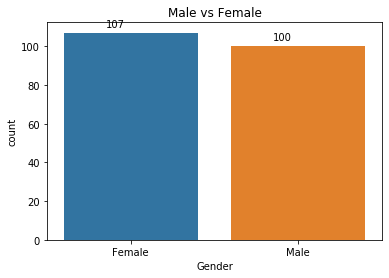

In [5]:
ax=sns.countplot(x='Gender',data=workdata)
plt.title('Male vs Female')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3))

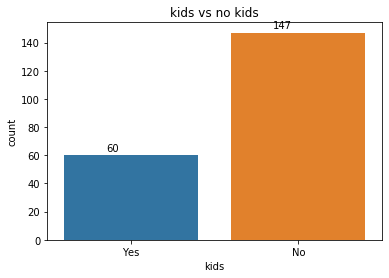

In [6]:
ax=sns.countplot(x='kids',data=workdata)
plt.title('kids vs no kids')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3))

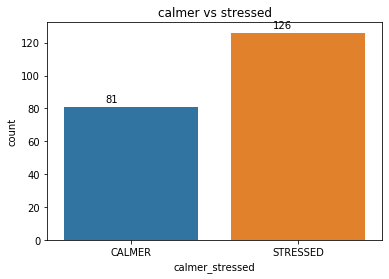

In [7]:
ax=sns.countplot(x='calmer_stressed',data=workdata)
plt.title('calmer vs stressed')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3)) 

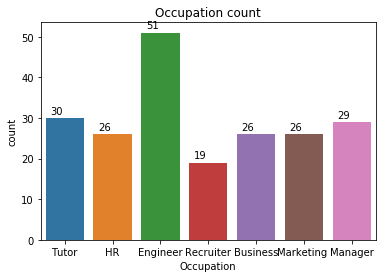

In [8]:
ax=sns.countplot(x='Occupation',data=workdata)
plt.title("Occupation count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 

In [9]:
workdata.describe()

,ID,Age,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,Target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,104.000000,29.666667,3.086957,3.101449,3.623188,3.043478,3.521739,0.405797
std,59.899917,8.506993,1.089301,1.255801,0.996617,1.247539,1.004002,0.492236
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,52.500000,25.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,104.000000,26.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.000000
75%,155.500000,29.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,207.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [10]:
workdata.isnull().sum()

ID                             0
Name                           0
Age                            0
Occupation                     0
Gender                         0
Same_ofiice_home_location      0
kids                           0
RM_save_money                  0
RM_quality_time                0
RM_better_sleep                0
calmer_stressed                0
RM_professional_growth         0
RM_lazy                        0
RM_productive                  0
digital_connect_sufficient     0
RM_better_work_life_balance    0
RM_improved_skillset           0
RM_job_opportunities           0
Target                         0
dtype: int64

In [11]:
gender=pd.get_dummies(workdata['Gender'],drop_first=True)
gender.head()

,Male
0,0
1,1
2,0
3,0
4,1


In [12]:
calm_stress=pd.get_dummies(workdata['calmer_stressed'],drop_first=True)
calm_stress.head()

,STRESSED
0,0
1,0
2,0
3,1
4,1


In [13]:
workdata=pd.concat([workdata,gender,calm_stress],axis=1)
workdata.drop(['Gender','calmer_stressed'],axis=1,inplace=True)

In [14]:
workdata.head()

,ID,Name,Age,Occupation,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Male,STRESSED
0,1,Bhavana,45,Tutor,Yes,Yes,Yes,Yes,Yes,5,1,5,Yes,5,5,Yes,1,0,0
1,2,Harry,24,Tutor,No,No,No,No,No,2,2,2,No,3,3,No,1,1,0
2,3,Banditaa,53,HR,Yes,Yes,Yes,Yes,Yes,3,3,4,No,5,3,No,1,0,0
3,4,Neetha,26,Engineer,Yes,No,Yes,Yes,No,3,4,4,No,4,5,Yes,0,0,1
4,5,Ram,26,Recruiter,Yes,No,No,Yes,No,3,3,5,Yes,4,2,Yes,1,1,1


In [15]:
categorical =  ['Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep', 'digital_connect_sufficient','RM_job_opportunities']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
workdata[categorical] = workdata[categorical].apply(binary_map)

In [16]:
workdata.head()

,ID,Name,Age,Occupation,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Male,STRESSED
0,1,Bhavana,45,Tutor,1.0,1,1,1,1,5,1,5,1,5,5,1.0,1,0,0
1,2,Harry,24,Tutor,0.0,0,0,0,0,2,2,2,0,3,3,0.0,1,1,0
2,3,Banditaa,53,HR,1.0,1,1,1,1,3,3,4,0,5,3,0.0,1,0,0
3,4,Neetha,26,Engineer,1.0,0,1,1,0,3,4,4,0,4,5,1.0,0,0,1
4,5,Ram,26,Recruiter,1.0,0,0,1,0,3,3,5,1,4,2,1.0,1,1,1


In [17]:
workdata.dtypes

ID                               int64
Name                            object
Age                              int64
Occupation                      object
Same_ofiice_home_location      float64
kids                             int64
RM_save_money                    int64
RM_quality_time                  int64
RM_better_sleep                  int64
RM_professional_growth           int64
RM_lazy                          int64
RM_productive                    int64
digital_connect_sufficient       int64
RM_better_work_life_balance      int64
RM_improved_skillset             int64
RM_job_opportunities           float64
Target                           int64
Male                             uint8
STRESSED                         uint8
dtype: object

In [18]:
workdata = workdata.dropna(subset=['Same_ofiice_home_location','RM_job_opportunities'])

In [19]:
X=workdata[['Age','Same_ofiice_home_location','kids','RM_save_money','RM_quality_time','RM_better_sleep','RM_professional_growth','RM_lazy','RM_productive','digital_connect_sufficient','RM_better_work_life_balance','RM_improved_skillset','RM_job_opportunities','Male','STRESSED']]
y=workdata['Target']

In [20]:
from sklearn.model_selection import train_test_split
np.random.seed(0) #so data can have same values
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=5)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[13  1]
 [ 2  8]]
-------------------------------------------
Accuracy of Logistic Regression: 87.5 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.89      0.80      0.84        10

    accuracy                           0.88        24
   macro avg       0.88      0.86      0.87        24
weighted avg       0.88      0.88      0.87        24



In [24]:
import math
from sklearn import metrics

#metrics to find accuracy of continous variables
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,lr_predict))
print('Mean squared value:',metrics.mean_squared_error(y_test,lr_predict))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,lr_predict)))

Mean Abs value: 0.125
Mean squared value: 0.125
root mean squared error value: 0.3535533905932738


In [25]:
dframe=pd.DataFrame({'actual':y_test,'Predicted':lr_predict})
dframe.head(20)

,actual,Predicted
125,0,0
101,1,1
68,0,0
15,1,0
144,0,0
42,0,0
98,1,1
74,1,1
95,0,0
128,0,0


In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,nbpred))

confussion matrix
[[11  3]
 [ 5  5]]
-------------------------------------------
Accuracy of Naive Bayes model: 66.66666666666666 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.62      0.50      0.56        10

    accuracy                           0.67        24
   macro avg       0.66      0.64      0.64        24
weighted avg       0.66      0.67      0.66        24



In [28]:
import math
from sklearn import metrics

#metrics to find accuracy of continous variables
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,nbpred))
print('Mean squared value:',metrics.mean_squared_error(y_test,nbpred))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,nbpred)))

Mean Abs value: 0.3333333333333333
Mean squared value: 0.3333333333333333
root mean squared error value: 0.5773502691896257


In [29]:
dframe=pd.DataFrame({'actual':y_test,'Predicted':nbpred})
dframe.head(20)

,actual,Predicted
125,0,0
101,1,0
68,0,1
15,1,0
144,0,0
42,0,0
98,1,1
74,1,0
95,0,0
128,0,0


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_predicted))

confussion matrix
[[13  1]
 [ 1  9]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 91.66666666666666 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.90      0.90      0.90        10

    accuracy                           0.92        24
   macro avg       0.91      0.91      0.91        24
weighted avg       0.92      0.92      0.92        24



In [32]:
import math
from sklearn import metrics
print('Mean Abs value:' ,metrics.mean_absolute_error(y_test,dt_predicted))
print('Mean squared value:',metrics.mean_squared_error(y_test,dt_predicted))
print('root mean squared error value:',math.sqrt(metrics.mean_squared_error(y_test,dt_predicted)))

Mean Abs value: 0.08333333333333333
Mean squared value: 0.08333333333333333
root mean squared error value: 0.28867513459481287


In [33]:
dframe=pd.DataFrame({'actual':y_test,'Predicted':dt_predicted})
dframe.head(20)

,actual,Predicted
125,0,1
101,1,0
68,0,0
15,1,1
144,0,0
42,0,0
98,1,1
74,1,1
95,0,0
128,0,0
